In [ ]:
!pip install pycaret[full]

In [ ]:
import pandas as pd

# df = pd.read_csv('https://raw.githubusercontent.com/elvanselvano/purwadhika-final-project/main/df_partially_cleaned_multicollinearity(2).csv?token=AL27OTMEGPDP6JPXIA7JX7TA6LMEQ')
# df = pd.read_csv('https://raw.githubusercontent.com/elvanselvano/purwadhika-final-project/main/train_clean_19930.csv?token=AL27OTNFU3DZ3FMEIP53OCTA6LSWI')
df = pd.read_csv('https://raw.githubusercontent.com/elvanselvano/purwadhika-final-project/main/dataset/df_clean_9.csv?token=AL27OTKTSSZ3QFWVCET7YDDA6PKLG')
df.head()

In [2]:
df.drop('QUALIFIED', axis=1, inplace=True)
df.drop('SALEYEAR', axis=1, inplace=True)
df.drop('SALE_NUM', axis=1, inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23374 entries, 0 to 23373
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BATHRM      23374 non-null  int64  
 1   HF_BATHRM   23374 non-null  int64  
 2   HEAT        23374 non-null  object 
 3   AC          23374 non-null  int64  
 4   BEDRM       23374 non-null  int64  
 5   AYB         23374 non-null  float64
 6   EYB         23374 non-null  int64  
 7   PRICE       23374 non-null  float64
 8   SALE_NUM    23374 non-null  int64  
 9   GBA         23374 non-null  float64
 10  STYLE       23374 non-null  object 
 11  STRUCT      23374 non-null  object 
 12  GRADE       23374 non-null  object 
 13  CNDTN       23374 non-null  object 
 14  EXTWALL     23374 non-null  object 
 15  ROOF        23374 non-null  object 
 16  INTWALL     23374 non-null  object 
 17  KITCHENS    23374 non-null  int64  
 18  FIREPLACES  23374 non-null  int64  
 19  USECODE     23374 non-nul

In [4]:
df.shape

(23374, 23)

In [ ]:
df.drop(['QUADRANT', 'SALEDATE', 'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ZIPCODE', ], axis=1, inplace=True) #88292.0509	
# df.drop(['QUADRANT', 'SALEDATE', 'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ZIPCODE', 'LANDAREA', 'SALEYEAR'], axis=1, inplace=True)

In [9]:
df.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'BEDRM', 'AYB', 'EYB', 'PRICE',
       'SALE_NUM', 'GBA', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL',
       'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA',
       'WARD', 'RMDL'],
      dtype='object')

In [ ]:
df.shape

(32519, 18)

In [7]:
# from pycaret.regression import *
# reg1 = setup(df, target = 'PRICE', session_id=38, log_experiment=True, 
#              combine_rare_levels = True,
#              experiment_name='price_modeling', use_gpu = True,
#              remove_outliers = True, feature_selection=True)

from pycaret.regression import *
reg1 = setup(df, target = 'PRICE', session_id=38, log_experiment=True, 
             experiment_name='price_modeling', use_gpu = True, normalize=True,
             remove_outliers = True)

,Description,Value
0,session_id,38
1,Target,PRICE
2,Original Data,"(23374, 23)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,18
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(15543, 107)"


In [9]:
top3 = compare_models(n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,72917.7447,1.016304e+10,100795.7490,0.8761,0.1686,0.1288,3.520
lightgbm,Light Gradient Boosting Machine,76592.4011,1.097779e+10,104748.8710,0.8661,0.1761,0.1360,0.269
xgboost,Extreme Gradient Boosting,77789.0289,1.150236e+10,107242.6789,0.8598,0.1794,0.1370,1.437
rf,Random Forest Regressor,78388.3364,1.194930e+10,109257.9809,0.8543,0.1801,0.1377,13.265
gbr,Gradient Boosting Regressor,85336.2303,1.317506e+10,114747.7160,0.8394,0.1928,0.1521,3.293
et,Extra Trees Regressor,83453.1474,1.360695e+10,116596.7787,0.8341,0.1931,0.1462,13.458
llar,Lasso Least Angle Regression,89657.2287,1.425664e+10,119352.6997,0.8262,0.2392,0.1633,0.052
br,Bayesian Ridge,89666.6554,1.425734e+10,119356.8785,0.8262,0.2414,0.1633,0.200
lr,Linear Regression,89688.3398,1.426054e+10,119369.7836,0.8261,0.2411,0.1634,0.092
lasso,Lasso Regression,89685.3133,1.426002e+10,119367.6492,0.8261,0.2410,0.1634,1.088


In [8]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,77498.1241,1.108813e+10,105300.2007,0.8624,0.1753,0.1372
1,76305.6287,1.128812e+10,106245.5659,0.8557,0.1786,0.1360
2,77431.6524,1.119362e+10,105799.9085,0.8607,0.1761,0.1382
3,77242.7118,1.106725e+10,105201.0096,0.8730,0.1807,0.1399
4,77761.2427,1.202901e+10,109676.8291,0.8552,0.1779,0.1353
5,74888.3619,1.006819e+10,100340.3922,0.8783,0.1711,0.1352
6,75834.4882,1.066822e+10,103287.0685,0.8676,0.1771,0.1364
7,75301.7298,1.052467e+10,102589.7963,0.8691,0.1704,0.1324
8,76819.5713,1.086942e+10,104256.5183,0.8703,0.1750,0.1333
9,76840.5005,1.098124e+10,104791.4210,0.8691,0.1785,0.1365


In [ ]:
tuned_lightgbm = tune_model(lightgbm, n_iter=250, optimize = 'MAE', search_library = 'optuna', early_stopping=True)

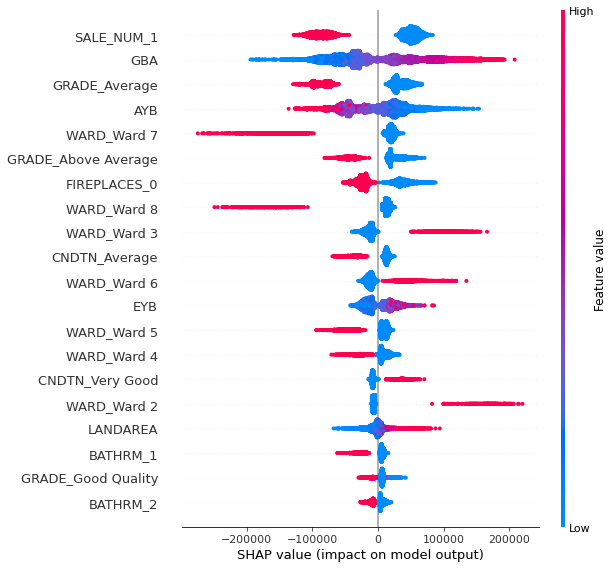

In [10]:
interpret_model(lightgbm)

In [ ]:
interpret_model(tuned_lightgbm)

In [ ]:
save_model(tuned_lightgbm, model_name='lightgbm-tuned')

In [ ]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,116566.8074,3.235046e+10,179862.3484,0.8362,0.3417,0.2830
1,112814.6210,2.993923e+10,173029.5524,0.8373,0.3598,0.3090
2,113133.5955,3.145370e+10,177351.8987,0.8535,0.3461,0.2852
3,120359.1537,3.653298e+10,191136.0168,0.8400,0.3581,0.3017
4,119879.6072,3.428475e+10,185161.4073,0.8400,0.3545,0.2968
5,109606.3134,2.937805e+10,171400.2649,0.8401,0.3391,0.2824
6,117514.6070,3.152266e+10,177546.2056,0.8379,0.3668,0.3177
7,116541.0209,2.915183e+10,170739.0581,0.8649,0.3643,0.3103
8,114933.5919,3.699272e+10,192334.9210,0.8157,0.3552,0.3000
9,113870.7223,3.190857e+10,178629.7075,0.8296,0.3493,0.2862


In [ ]:
tuned_catboost = tune_model(catboost, n_iter=250, optimize = 'MAE', search_library = 'optuna',
                            early_stopping=True)

In [ ]:
interpret_model(tuned_catboost)

In [ ]:
save_model(tuned_catboost, model_name='catboost-tuned')

In [ ]:
xgboost = create_model('catboost')

In [ ]:
tuned_xgboost = tune_model(xgboost, n_iter=250, optimize = 'MAE', search_library = 'optuna')

In [ ]:
interpret_model(tuned_xgboost)

In [ ]:
stacker = stack_models([tuned_lightgbm, tuned_catboost, tuned_xgboost])

In [11]:
stacker = stack_models(top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,73975.4806,1.018880e+10,100939.5817,0.8735,0.1675,0.1300
1,72169.7963,1.047036e+10,102324.7715,0.8661,0.1697,0.1275
2,73157.1003,1.015538e+10,100773.8814,0.8736,0.1680,0.1298
3,73074.4457,1.026202e+10,101301.6305,0.8823,0.1716,0.1311
4,73398.9600,1.079943e+10,103920.3054,0.8700,0.1698,0.1275
5,71707.1427,9.606367e+09,98012.0745,0.8838,0.1643,0.1277
6,73190.8482,9.908238e+09,99540.1347,0.8770,0.1717,0.1314
7,71907.8726,9.695979e+09,98468.1645,0.8794,0.1621,0.1250
8,73582.9642,1.021858e+10,101086.9856,0.8781,0.1690,0.1271
9,72541.6799,1.002086e+10,100104.2509,0.8806,0.1695,0.1281


In [13]:
save_model(stacker, model_name='3-models-tuned')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='PRICE',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                                              n_estimators=100,
                                                              n_jobs=-1,
                                                              num_parallel_tree=1,
                                                              objective='reg:

In [ ]:
save_model(stacker, model_name='best-model-stacker')

In [ ]:
https://pycaret.org/predict-model/